In [71]:
from bs4 import BeautifulSoup
import selenium
from selenium import webdriver
import time
import base64
import cv2
import matplotlib.pyplot as plt
import glob
import requests
import os
import io
from PIL import Image
import hashlib

In [72]:
driver_path = 'C:/games/chromedriver'

web_driv = webdriver.Chrome(executable_path = driver_path)

In [73]:
search_url = f"https://www.google.com/search?safe=off&site=&tbm=isch&source=hp&q=Dogs&oq=Dog&gs_l=img"


In [74]:
web_driv.get(search_url)

In [75]:
image_urls = set()
image_count = 0
number_results = 0

In [76]:
def scroll_to_end(web_driv, scroll_point):
    web_driv.execute_script(f"window.scrollTo(0, {scroll_point});")
    time.sleep(1)


In [78]:
number_results

9

<selenium.webdriver.remote.webelement.WebElement (session="3ed1bd2f61d0d2b724849f2ca26e2ff6", element="b97c3a82-d26e-44c9-8573-8f74cd7a543f")>
https://www.google.com/logos/doodles/2020/wear-a-mask-save-lives-sep-16-17-6753651837108822.2-s.png
<selenium.webdriver.remote.webelement.WebElement (session="3ed1bd2f61d0d2b724849f2ca26e2ff6", element="62c5c400-9a87-49a9-8822-15dfd5f76eae")>

<selenium.webdriver.remote.webelement.WebElement (session="3ed1bd2f61d0d2b724849f2ca26e2ff6", element="17fa2d70-7c62-4da1-ac3c-0d87886521ef")>


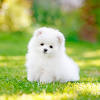
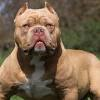

<selenium.webdriver.remote.webelement.WebElement (session="3ed1bd2f61d0d2b724849f2ca26e2ff6", element="8bf33dcc-4a66-4126-9996-b5044fe6d648")>

<selenium.webdriver.remote.webelement.WebElement (session="3ed1bd2f61d0d2b724849f2ca26e2ff6", element="f5554143-2660-4f5e-8dac-bef083d1a055")>

<selenium.webdriver.remote.webelement.WebElement (session="3ed1bd2f61d0d2b724849f2ca26e2ff6", element="dbb84273-2936-4556-ac43-b469493ac185")>


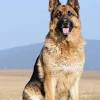
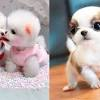
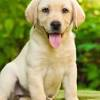

<selenium.webdriver.remote.webelement.WebElement (session="3ed1bd2f61d0d2b724849f2ca26e2ff6", element="4d2fbae7-31e8-4db7-81b6-e60b7189b4b3")>

<selenium.webdriver.remote.webelement.WebElement (session="3ed1bd2f61d0d2b724849f2ca26e2ff6", element="8f1b7ccd-1d77-4247-870a-15201c07dc60")>

<selenium.webdriver.remote.webelement.WebElement (session="3ed1bd2f61d0d2b724849f2ca26e2ff6", element="0e427402-5e96-4255-b528-94ca26301810")>


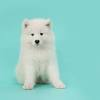
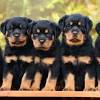
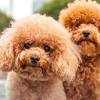

KeyboardInterrupt: 

In [77]:
for i in range(1,20):
        scroll_to_end(web_driv, i*100)
        time.sleep(5)
        thumb = web_driv.find_elements_by_css_selector("img")
        for img in thumb:
            print(img)
            print(img.get_attribute('src'))
            image_urls.add(img.get_attribute('src'))
            image_count = len(image_urls)
            number_results = image_count
            time.sleep(.5)
        print(f"Found: {number_results} search results. Extracting links...")


In [9]:
folder_path = 'C:/games/Scraper/'
i=0

In [24]:
for urls in image_urls:
    try:
        image_content = requests.get(urls).content
        print("Successfully downloaded")   
        try:
            image_file = io.BytesIO(image_content)
            image = Image.open(image_file).convert('RGB')
            file_path=os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10]+'.jpg')
            with open(file_path , 'wb') as f:
                image.save(f, "JPEG", quality=85)
                print('Successfully Saved')
        except Exception as e:
            print("Couldnt be saved")
        
        
    except Exception as e:
        try:
            urls = urls.split(',')[1]
            base64_bytes = urls.encode('ascii')
            imgdata = base64.b64decode(urls)
            filename = f'{folder_path}/{hashlib.sha1(base64_bytes).hexdigest()[:10]}.jpg'
            with open(filename, 'wb') as f:
                f.write(imgdata)
                print("Successfully downloaded and Saved")      
            
        except Exception as e:
            print("Cannot Download")           
    

Successfully downloaded
Couldnt be saved
Successfully downloaded and Saved
Successfully downloaded and Saved
Successfully downloaded
Couldnt be saved
Successfully downloaded
Couldnt be saved
Successfully downloaded and Saved
Successfully downloaded and Saved
Successfully downloaded and Saved
Successfully downloaded
Couldnt be saved
Successfully downloaded
Couldnt be saved
Successfully downloaded and Saved
Successfully downloaded and Saved
Successfully downloaded and Saved
Successfully downloaded
Couldnt be saved
Successfully downloaded and Saved
Successfully downloaded
Couldnt be saved
Successfully downloaded and Saved
Successfully downloaded and Saved
Successfully downloaded and Saved
Successfully downloaded and Saved
Successfully downloaded and Saved
Successfully downloaded and Saved
Successfully downloaded
Couldnt be saved
Successfully downloaded
Couldnt be saved
Successfully downloaded
Couldnt be saved
Successfully downloaded
Couldnt be saved
Successfully downloaded and Saved
Succe

In [11]:
web_driv.quit()

In [ ]:
 try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print("Succesfully Saved")
    except Exception as e:
        print("ERROR - Could not save")
        

In [55]:
Dir = "C:/games/Scraper/*.jpg"

tranning_data=[]

for img in glob.glob(Dir):
    try:
        img_array = cv2.imread(img , cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array,(100,100))
        tranning_data.append([new_img_array,"DOG"])
    except:
        pass

In [60]:
tranning_data

[[array([[206, 206, 206, ..., 206, 206, 206],
         [206, 206, 206, ..., 206, 206, 206],
         [206, 206, 206, ..., 205, 205, 205],
         ...,
         [184, 184, 185, ..., 166, 168, 173],
         [185, 186, 187, ..., 162, 164, 172],
         [190, 190, 193, ..., 160, 162, 173]], dtype=uint8), 'DOG'],
 [array([[ 79,  79,  79, ..., 101, 101, 100],
         [ 78,  78,  78, ..., 101, 101, 100],
         [ 77,  77,  77, ..., 100, 100,  99],
         ...,
         [204, 204, 204, ..., 210, 210, 210],
         [205, 205, 205, ..., 210, 210, 210],
         [206, 206, 206, ..., 210, 210, 210]], dtype=uint8), 'DOG'],
 [array([[ 72,  54,  52, ...,  38,  44,  40],
         [ 76,  64,  63, ...,  37,  43,  41],
         [ 80,  78,  75, ...,  35,  42,  42],
         ...,
         [186, 196, 193, ..., 189, 183, 194],
         [189, 194, 206, ..., 186, 192, 196],
         [195, 194, 208, ..., 188, 178, 198]], dtype=uint8), 'DOG'],
 [array([[203, 206, 208, ..., 204, 203, 201],
         [205, 

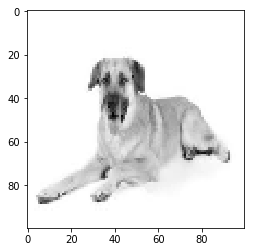

In [58]:
new_img_array = cv2.resize(img_array,(100,100))
plt.imshow(new_img_array , cmap = 'gray')  

In [61]:
X=[]
Y=[]
for features,labels in tranning_data:
    X.append(features)
    Y.append(labels)

['DOG',
 'DOG',
 'DOG',
 'DOG',
 'DOG',
 'DOG',
 'DOG',
 'DOG',
 'DOG',
 'DOG',
 'DOG',
 'DOG',
 'DOG',
 'DOG',
 'DOG',
 'DOG',
 'DOG',
 'DOG',
 'DOG',
 'DOG',
 'DOG',
 'DOG',
 'DOG',
 'DOG',
 'DOG',
 'DOG',
 'DOG',
 'DOG',
 'DOG',
 'DOG',
 'DOG',
 'DOG',
 'DOG',
 'DOG']